# Previsão de Risco de Crédito

### Informações do Aluno

- **Curso**: Programa de Pós-Graduação em Computação Aplicada - UnB
- **Disciplina**: Análise Estatística de Dados e Informação
- **Data**: 09 de fevereiro de 2025
- **Autor**: Ebenezer Andrade da Silva
- **Matricula**: 241134715
- **Prova Final - Questão 04**

### Fonte dos Dados
Os dados utilizados neste notebook são públicos e estão disponíveis no Kaggle. Você pode acessá-los através do link abaixo:

[credit_risk_customers - Kaggle](https://www.kaggle.com/datasets/ppb00x/credit-risk-customers)

Este conjunto de dados contém 20 características dos clientes

O objetivo deste notebook é construir um modelo capaz de prever e explicar os fatores que levam bancos a classificarem clientes como bons ou maus pagadores

### Estrutura do Notebook
1. **Importação das Bibliotecas**
2. **Carregamento dos Dados**
3. **Análise Exploratória de Dados (EDA)**
4. **Criação do Modelo**
5. **Ajuste do Modelo**
6. **Justificativa da Regressão Logística**

### Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Discussão sobre o problema

O risco de crédito representa a possibilidade de inadimplência dos mutuários, impactando a saúde financeira das instituições e a oferta de crédito. Para mitigá-lo, bancos utilizam modelos estatísticos e algoritmos de machine learning para classificar clientes e tomar decisões mais precisas na concessão de crédito e definição de taxas de juros (Thomas et al., 2017).

Essa análise é essencial para o crescimento econômico, pois o crédito impulsiona consumo e investimento. No entanto, uma gestão inadequada pode levar a crises financeiras, como a de 2008, provocada pela inadimplência em empréstimos subprime (Brunnermeier, 2009). Assim, o uso de modelos preditivos eficazes fortalece a estabilidade financeira e pode promover um desenvolvimento econômico sustentável.

In [2]:
file_path = "credit_customers.csv"
df = pd.read_csv(file_path)

### Análise Exploratória dos Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [5]:
# Verificar valores ausentes
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [6]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


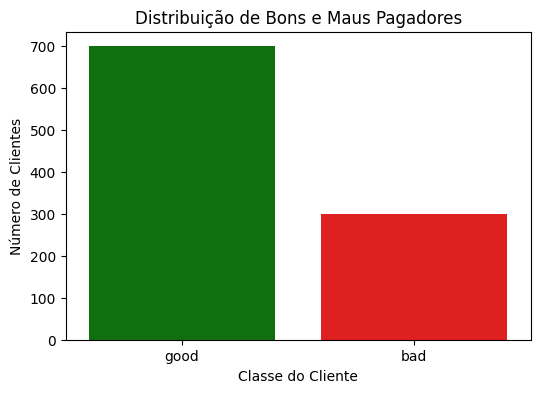

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=df, hue="class", palette=["green", "red"], legend=False)
plt.xlabel("Classe do Cliente")
plt.ylabel("Número de Clientes")
plt.title("Distribuição de Bons e Maus Pagadores")
plt.show()

Observa-se um desequilíbrio, com um número significativamente maior de bons pagadores

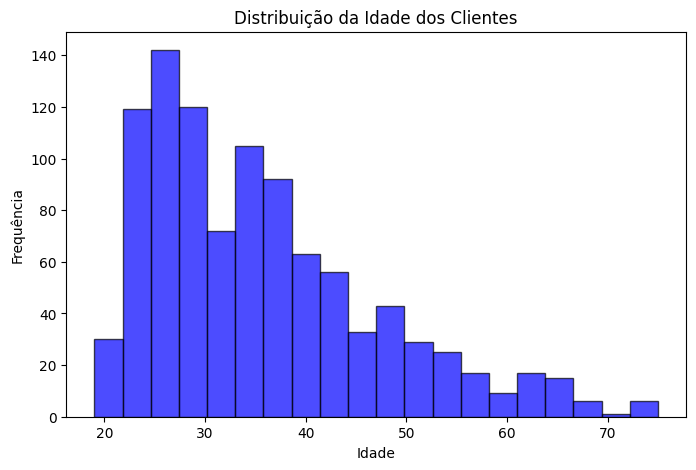

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df["age"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição da Idade dos Clientes")
plt.show()


O histograma mostra a distribuição da idade dos clientes, com maior concentração entre 20 e 40 anos, atingindo um pico por volta dos 30 anos. A frequência diminui gradualmente para idades mais altas, resultando em uma distribuição assimétrica à direita. Esse padrão sugere que a maioria dos clientes é jovem.

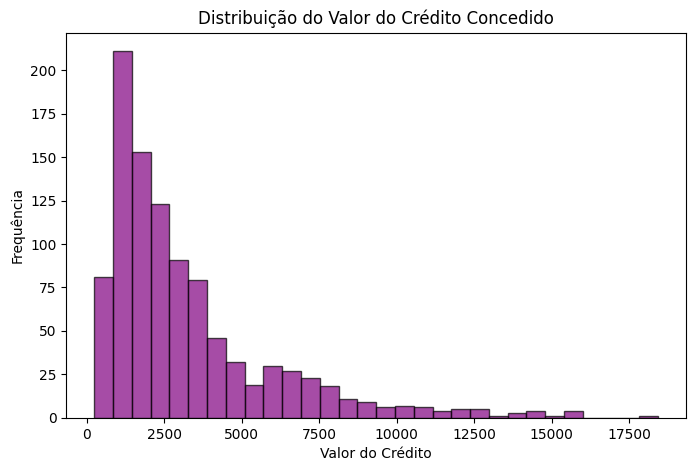

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df["credit_amount"], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel("Valor do Crédito")
plt.ylabel("Frequência")
plt.title("Distribuição do Valor do Crédito Concedido")
plt.show()

O histograma mostra a distribuição do valor do crédito concedido, com a maioria dos valores concentrados abaixo de 5.000 e um pico próximo de 1.000 a 2.000. A distribuição é assimétrica à direita, indicando que poucos clientes receberam valores elevados de crédito, enquanto a maioria obteve quantias menores. Esse padrão sugere que concessões de crédito mais altas são menos frequentes,

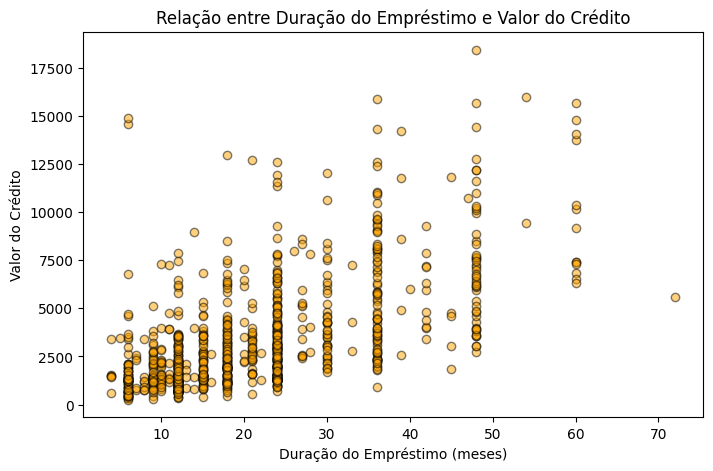

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df["duration"], df["credit_amount"], alpha=0.5, color='orange', edgecolors='black')
plt.xlabel("Duração do Empréstimo (meses)")
plt.ylabel("Valor do Crédito")
plt.title("Relação entre Duração do Empréstimo e Valor do Crédito")
plt.show()

O gráfico de dispersão ilustra a relação entre a duração do empréstimo (em meses) e o valor do crédito concedido. Observa-se que empréstimos de curta duração (abaixo de 20 meses) tendem a ter valores menores, enquanto empréstimos mais longos apresentam uma maior variação nos valores de crédito. Há uma concentração de pontos em certas durações específicas (como 12, 24, 36 e 48 meses), sugerindo que esses prazos são mais comuns. A distribuição indica uma possível tendência de que empréstimos mais longos podem estar associados a valores de crédito mais elevados.

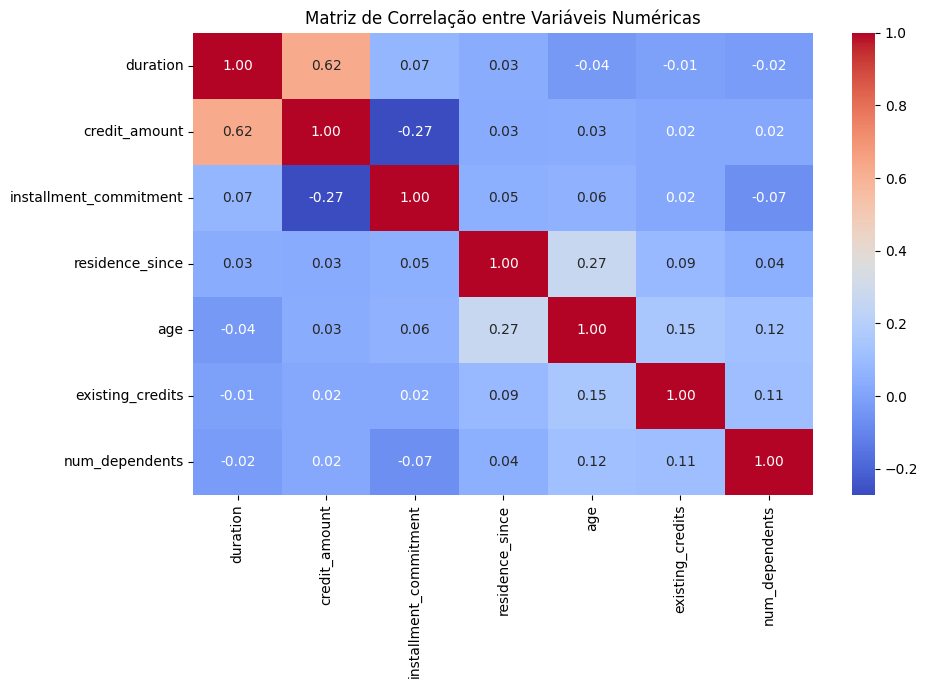

In [11]:
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

A maior correlação positiva ocorre entre duração do empréstimo e valor do crédito (0.62), sugerindo que empréstimos mais longos estão associados a valores mais altos. Já `installment_commitment` tem correlação negativa com `credit_amount` **(-0.27)**, indicando que parcelas mais altas podem estar associadas a menores valores de crédito. No geral, a maioria das variáveis apresenta correlação fraca entre si.

### Definição e Seleção dos Modelos

Escolha dos Modelos
Para prever se um cliente será um bom ou mau pagador, o problema pode ser tratado como uma classificação binária. Algumas opções de modelos que podem ser usados são:

- **Regressão Logística** – Simples e interpretável, útil para entender a influência das variáveis sobre o risco de crédito.
- **Árvores de Decisão** – Modelo não linear que captura relações complexas nos dados.
- **Random Forest** – Conjunto de várias árvores de decisão, aumentando a precisão e reduzindo o overfitting.
- **XGBoost** – Algoritmo avançado de boosting, altamente eficiente para esse tipo de problema.
- Redes Neurais – Pode ser usado, mas exige mais dados e maior capacidade computacional (Não foi aplicado).

#### Regressão Logística

In [12]:
# Criar uma cópia do dataframe
df_model_logistic = df.copy()

In [13]:
# Converter variáveis categóricas
label_encoders = {}
for col in df_model_logistic.select_dtypes(include=['object']).columns:
    if col != 'class':
        le = LabelEncoder()
        df_model_logistic[col] = le.fit_transform(df_model_logistic[col])
        label_encoders[col] = le

In [14]:
# Transformar a variável-alvo em numérica ('good' -> 1, 'bad' -> 0)
df_model_logistic['class'] = df_model_logistic['class'].map({'good': 1, 'bad': 0})

In [15]:
# Separar features (X) e variável-alvo (y)
X = df_model_logistic.drop(columns=['class'])
y = df_model_logistic['class']

In [16]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Criar e treinar o modelo de Regressão Logística com normalização
logistic_model = LogisticRegression(max_iter=5000, solver='saga', random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='saga')

In [19]:
# Fazer previsões
y_pred_logistic = logistic_model.predict(X_test)

In [20]:
# Avaliar o modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

In [21]:
print(f"Acurácia da Regressão Logística: {accuracy_logistic:.2f}")
print("\nRelatório de Classificação:\n", classification_rep_logistic)

Acurácia da Regressão Logística: 0.71

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.03      0.07        59
           1       0.71      1.00      0.83       141

    accuracy                           0.71       200
   macro avg       0.86      0.52      0.45       200
weighted avg       0.80      0.71      0.61       200



O modelo de Regressão Logística apresenta 71% de acurácia, mas está altamente enviesado para classificar clientes como bons pagadores (Classe 1). Ele identifica 100% dos bons pagadores, mas apenas 3% dos maus pagadores, o que é um problema crítico para análise de risco de crédito, pois pode levar a altos níveis de inadimplência. 

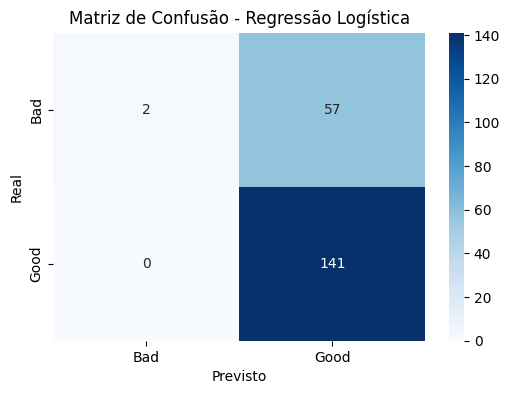

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

A matriz de confusão da Regressão Logística mostra que o modelo classifica bem os bons pagadores (141 acertos), mas tem dificuldade em identificar maus pagadores, cometendo 57 erros ao classificá-los incorretamente como bons. Apenas 2 maus pagadores foram corretamente previstos, e nenhum bom pagador foi classificado erroneamente como mau.

In [23]:
feature_importances_logistic = pd.Series(logistic_model.coef_[0], index=X.columns)

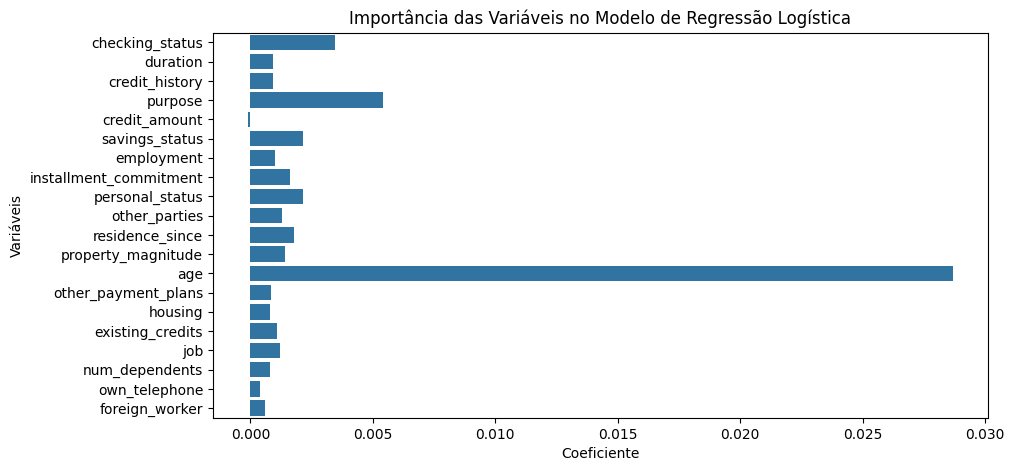

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances_logistic, y=feature_importances_logistic.index)
plt.xlabel("Coeficiente")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo de Regressão Logística")
plt.show()

A variável "age" tem o maior impacto, sugerindo que a idade dos clientes desempenha um papel significativo na classificação. Outras variáveis, como `credit_history`, `checking_status` e `savings_status`, também possuem alguma relevância, enquanto variáveis como `foreign_worker` e `own_telephone` têm pouca influência. Essa análise sugere que fatores financeiros e históricos de crédito são mais determinantes do que características pessoais na previsão do modelo.

#### Árvores de Decisão

In [25]:
# Criar uma cópia do dataframe
df_model_tree = df.copy()

In [26]:
# Converter variáveis categóricas em numéricas
label_encoders = {}
for col in df_model_tree.select_dtypes(include=['object']).columns:
    if col != 'class':
        le = LabelEncoder()
        df_model_tree[col] = le.fit_transform(df_model_tree[col])
        label_encoders[col] = le

In [27]:
# Transformar a variável-alvo em numérica ('good' -> 1, 'bad' -> 0)
df_model_tree['class'] = df_model_tree['class'].map({'good': 1, 'bad': 0})

In [28]:
# Separar features (X) e variável-alvo (y)
X = df_model_tree.drop(columns=['class'])
y = df_model_tree['class']

In [29]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
# Criar e treinar o modelo
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Fazer previsões
y_pred_tree = decision_tree_model.predict(X_test)

In [33]:
# Avaliar o modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

In [34]:
# Exibir os resultados
print(f"Acurácia da Árvore de Decisão: {accuracy_tree:.2f}")
print("\nRelatório de Classificação:\n", classification_rep_tree)

Acurácia da Árvore de Decisão: 0.70

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50        59
           1       0.79      0.79      0.79       141

    accuracy                           0.70       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.70      0.71       200



O modelo de Árvore de Decisão apresenta 70% de acurácia, mas tem dificuldades em identificar maus pagadores (Classe 0), com apenas 50% de precisão e recall, o que pode gerar risco para o banco. Já para bons pagadores (Classe 1), o desempenho é melhor, com 79% de precisão e recall. Isso indica que o modelo está enviesado para aprovar mais clientes do que deveria. 

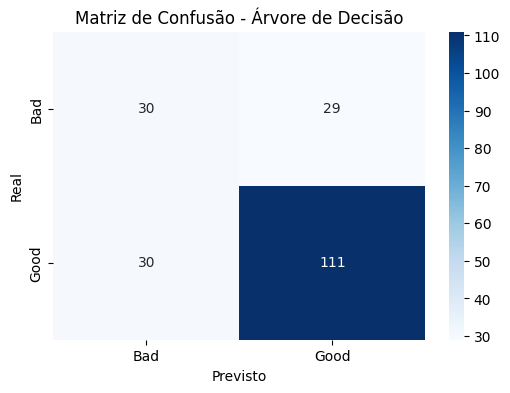

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

A matriz de confusão do modelo de Árvore de Decisão mostra que ele classificou corretamente 111 bons pagadores e 30 maus pagadores, mas cometeu 29 falsos positivos (maus pagadores previstos como bons) e 30 falsos negativos (bons pagadores previstos como maus). O modelo apresenta erros relativamente equilibrados entre as classes, sugerindo que pode estar subajustado

In [36]:
feature_importances_tree = pd.Series(decision_tree_model.feature_importances_, index=X.columns)

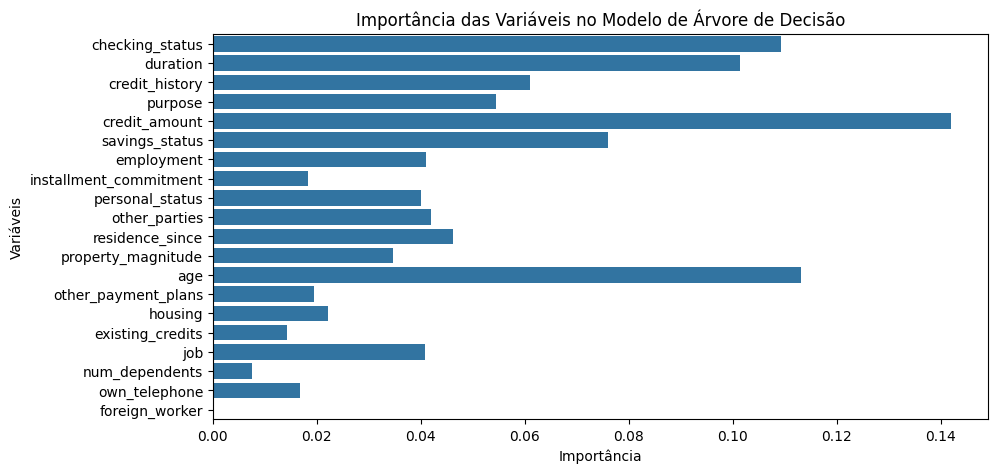

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances_tree, y=feature_importances_tree.index)
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo de Árvore de Decisão")
plt.show()

O gráfico mostra a importância das variáveis no modelo de Árvore de Decisão, destacando `credit_amount` e `checking_status` como os fatores mais influentes na previsão. Outras variáveis como `property_magnitude`, `savings_status` e `duration` também apresentam impacto significativo, enquanto `foreign_worker` e `own_telephone` têm pouca relevância. O modelo se baseia fortemente em fatores financeiros para tomar decisões

#### Random Forest

In [38]:
# Criar uma cópia do dataframe
df_model = df.copy()

In [39]:
# Converter variáveis categóricas em numéricas
label_encoders = {}
for col in df_model.select_dtypes(include=['object']).columns:
    if col != 'class':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le

In [40]:
# Transformar a variável-alvo em numérica ('good' -> 1, 'bad' -> 0)
df_model['class'] = df_model['class'].map({'good': 1, 'bad': 0})

In [41]:
# Separar features (X) e variável-alvo (y)
X = df_model.drop(columns=['class'])
y = df_model['class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Criar e treinar o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Fazer previsões
y_pred = rf_model.predict(X_test)

In [45]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [46]:
# Exibir os resultados
print(f"Acurácia: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_rep)

Acurácia: 0.80

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.47      0.58        59
           1       0.81      0.93      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



O modelo Random Forest alcançou uma acurácia de 80%, indicando um desempenho sólido na classificação de clientes entre bons e maus pagadores. Para bons pagadores (Classe 1), o modelo tem um recall de 93%, o que significa que ele detecta quase todos corretamente. No entanto, para maus pagadores (Classe 0), o recall é apenas 47%, indicando que mais da metade dos maus pagadores está sendo incorretamente classificada como bons pagadores, o que representa um risco para decisões de crédito. A precisão para Classe 0 (74%) sugere que, quando o modelo prevê que alguém é um mau pagador, ele está certo na maioria dos casos, mas sua capacidade de identificar maus pagadores ainda é limitada.

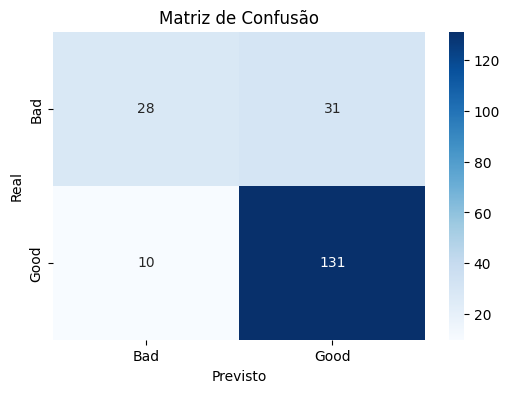

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

A matriz de confusão mostra que o modelo classificou corretamente 131 bons pagadores e 28 maus pagadores, porém cometeu 31 erros ao prever maus pagadores como bons e 10 erros ao classificar bons pagadores como maus. O modelo apresenta boa precisão para bons pagadores mas ainda cabe melhorias para reduzir os falsos positivos

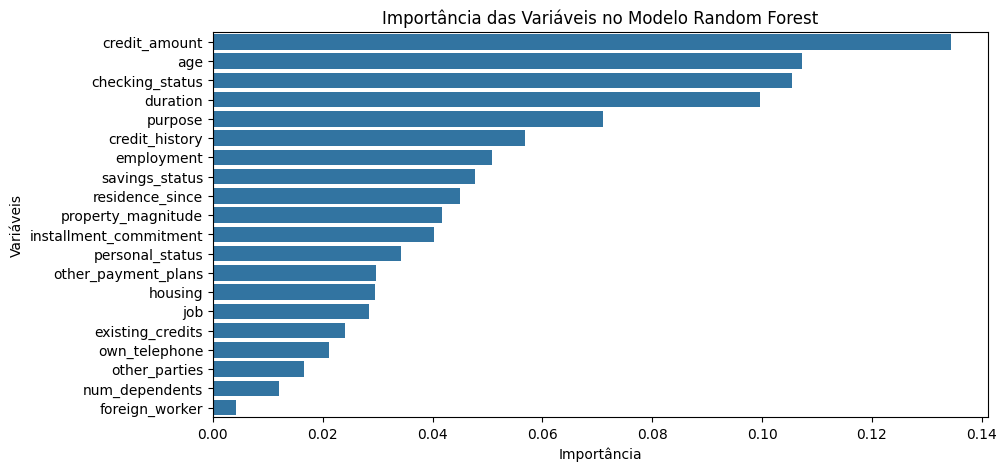

In [48]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo Random Forest")
plt.show()

O gráfico mostra a importância das variáveis no modelo Random Forest, destacando `credit_amount`, `age`, `checking_status` e `duration` como os fatores mais influentes na previsão. Isso indica que o modelo se baseia fortemente no valor do crédito, idade do cliente e situação financeira para tomar decisões.

#### XGBoost

In [49]:
# Criar uma cópia do dataframe
df_model_xgb = df.copy()

In [50]:
# Converter variáveis categóricas em numéricas
label_encoders = {}
for col in df_model_xgb.select_dtypes(include=['object']).columns:
    if col != 'class':  # Evitar codificar a variável-alvo diretamente
        le = LabelEncoder()
        df_model_xgb[col] = le.fit_transform(df_model_xgb[col])
        label_encoders[col] = le

In [51]:
# Transformar a variável-alvo em numérica ('good' -> 1, 'bad' -> 0)
df_model_xgb['class'] = df_model_xgb['class'].map({'good': 1, 'bad': 0})

In [52]:
# Garantir que não há valores nulos na variável-alvo
df_model_xgb = df_model_xgb.dropna(subset=['class'])

In [53]:
# Converter a variável-alvo para inteiro
df_model_xgb['class'] = df_model_xgb['class'].astype(int)

In [54]:
# Separar features (X) e variável-alvo (y)
X = df_model_xgb.drop(columns=['class'])
y = df_model_xgb['class']

In [55]:
# Normalizar os dados para melhor desempenho
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:
# Criar e treinar o modelo
xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = xgb_model.predict(X_test)

In [58]:
# Avaliar o modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

In [59]:
print(f"Acurácia do XGBoost: {accuracy_xgb:.2f}")
print("\nRelatório de Classificação:\n", classification_rep_xgb)

Acurácia do XGBoost: 0.79

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.54      0.60        59
           1       0.82      0.89      0.85       141

    accuracy                           0.79       200
   macro avg       0.74      0.71      0.73       200
weighted avg       0.78      0.79      0.78       200



O modelo XGBoost atingiu 79% de acurácia, demonstrando um bom desempenho geral. Ele identifica 89% dos bons pagadores (Classe 1) corretamente (recall = 0.89), mas tem dificuldade em detectar maus pagadores (Classe 0), com apenas 54% de recall. Isso significa que o modelo ainda está inclinando para aprovar clientes, podendo permitir alguns maus pagadores passarem despercebidos. No entanto, sua precisão para a Classe 0 é de 67%, indicando que quando prevê um cliente como mau pagador, ele está certo na maioria das vezes. O F1-score equilibrado entre as classes (0.60 para maus pagadores e 0.85 para bons pagadores) sugere um desempenho melhor do que a Árvore de Decisão

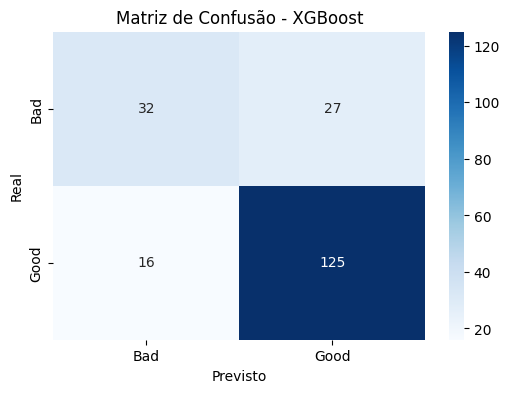

In [60]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost")
plt.show()

A matriz de confusão mostra um bom desempenho na classificação, identificando corretamente 125 bons pagadores e 32 maus pagadores. No entanto, ainda comete 27 erros ao classificar maus pagadores como bons e 16 ao classificar bons pagadores como maus.

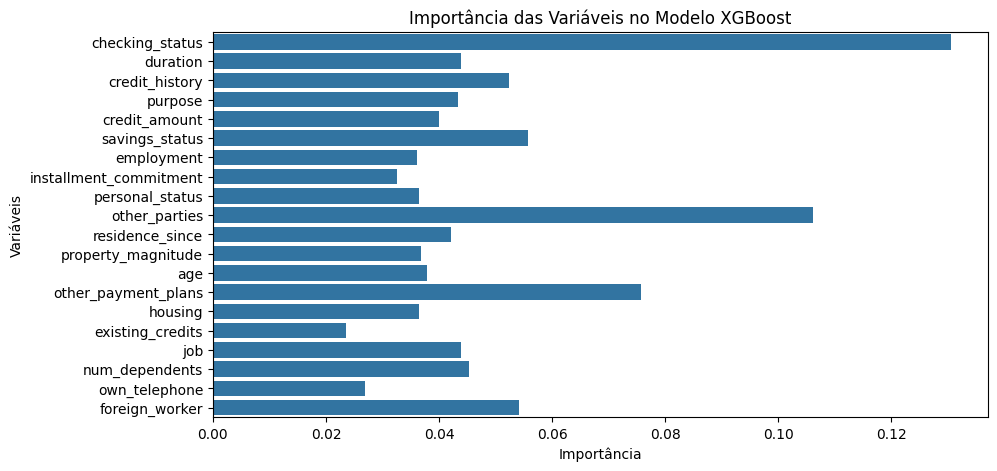

In [61]:
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances_xgb, y=feature_importances_xgb.index)
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo XGBoost")
plt.show()

O gráfico exibe a importância das variáveis no modelo, destacando `checking_status` como o fator mais influente na previsão, seguido por `personal_status`, `other_payment_plans` e `credit_amount`. Isso indica que o modelo se baseia fortemente em informações financeiras e histórico de pagamentos para classificar os clientes. 

#### Comparação de Modelos para Previsão de Risco de Crédito

| Modelo               | Acurácia | Precisão (Classe 0) | Recall (Classe 0) | F1-Score (Classe 0) | Precisão (Classe 1) | Recall (Classe 1) | F1-Score (Classe 1) |
|----------------------|----------|----------------------|--------------------|----------------------|----------------------|--------------------|----------------------|
| **Regressão Logística** | 0.71     | 1.00                 | 0.03               | 0.07                 | 0.71                 | 1.00               | 0.83                 |
| **Árvore de Decisão**   | 0.70     | 0.50                 | 0.51               | 0.50                 | 0.79                 | 0.79               | 0.79                 |
| **Random Forest**       | 0.80     | 0.74                 | 0.47               | 0.58                 | 0.81                 | 0.93               | 0.86                 |
| **XGBoost**            | 0.79     | 0.67                 | 0.54               | 0.60                 | 0.82                 | 0.89               | 0.85                 |

##### **Análise Comparativa**
1. **Melhor modelo em acurácia:** **Random Forest (80%)** seguido de **XGBoost (79%)**.
2. **Melhor recall para Maus Pagadores (Classe 0):** **XGBoost (54%)**, o que significa que ele detecta mais inadimplentes.
3. **Melhor recall para Bons Pagadores (Classe 1):** **Random Forest (93%)**, garantindo menos falsos negativos.
4. **Regressão Logística tem um recall extremamente baixo (3%) para maus pagadores**, tornando-a ineficaz para o risco de crédito.
5. **Árvore de Decisão apresenta desempenho equilibrado, mas inferior ao XGBoost e Random Forest.**

##### **Conclusão**
- O **Random Forest** e o **XGBoost** são os modelos mais promissores.
- O **Random Forest** tem **melhor recall para bons pagadores**, sendo mais conservador na classificação de maus pagadores.
- O **XGBoost** tem **melhor recall para maus pagadores**, o que pode ser mais útil para evitar inadimplência.
- **Ajuste de hiperparâmetros ou balanceamento de classes** pode melhorar ainda mais os modelos.



#### Explicabilidade das Variáveis - SHAP value

In [62]:
explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_test)

<Figure size 1400x1000 with 0 Axes>

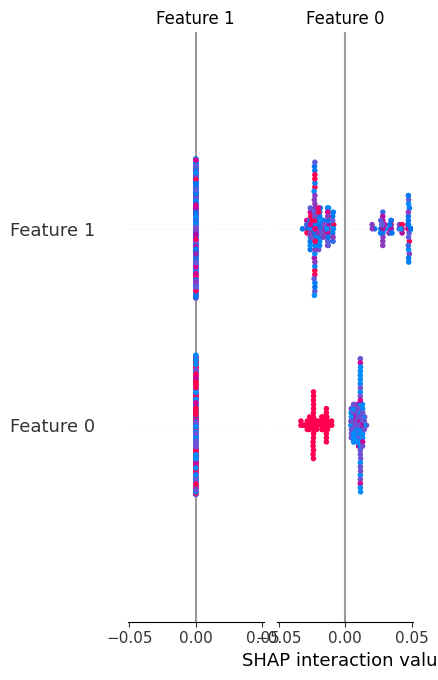

In [63]:
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values_rf, X_test)

O gráfico de interação SHAP mostra o impacto das variáveis `duration` e `checking_status` nas previsões do modelo Random Forest. A variável `duration` tem uma ampla dispersão nos valores SHAP, indicando um efeito significativo e não linear, enquanto `checking_status` apresenta grupos bem definidos, sugerindo padrões consistentes na previsão. A interação entre essas variáveis influencia fortemente as decisões do modelo, indicando que valores extremos podem ter maior impacto nas previsões.

### Tomada de Decisão

| **Categoria**                               | **Recomendações Estratégicas**                                                                 |
|---------------------------------------------|----------------------------------------------------------------------------------------------|
| **Priorização de Variáveis-Chave**          | Focar na análise de `credit_amount`, `age`, `checking_status` e `duration`. |
| **Refinamento das Políticas de Crédito**    | Criar regras diferenciadas para clientes com **baixo histórico de crédito**, exigindo garantias adicionais. |
| **Monitoramento Contínuo**                   | Implementar **reavaliação periódica** dos clientes para prever inadimplência e ajustar limites de crédito. |
| **Segmentação e Personalização**            | Criar políticas diferenciadas para clientes **mais jovens e com menos garantias**, ajustando limites de crédito. |

### **Conclusão**
Os resultados do modelo **Random Forest** ajudam a otimizar a **gestão do risco de crédito**, permitindo aprimorar políticas de concessão, segmentação e estratégias de mitigação de inadimplência. A adoção de **monitoramento dinâmico**, ajustes no **limiar de decisão** e personalização das condições de crédito permitirá um equilíbrio entre **crescimento sustentável e redução de riscos financeiros**.


## Referências

- Thomas, L. C., Crook, J. N., & Edelman, D. B. (2017). *Credit scoring and its applications*. SIAM.  
- Brunnermeier, M. K. (2009). *Deciphering the liquidity and credit crunch 2007–2008*. Journal of Economic Perspectives, **23**(1), 77-100.  
